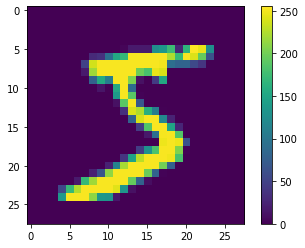

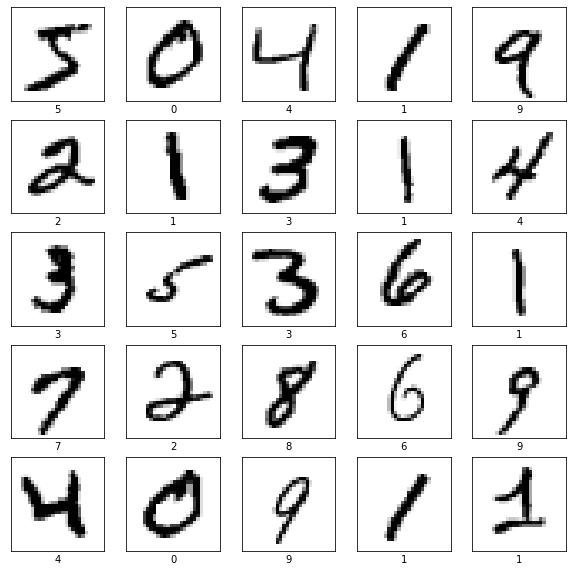

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#データの前処理
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

class_names=["0","1","2","3","4","5","6","7","8","9"]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [41]:
#正規化
x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0
#onehotencoding
#tf.one_hot(データの記入,何個の異なるデータがあるか（uniqueの数）)
y_train_oh=tf.one_hot(y_train,10)
print(y_train)
print(y_train_oh)
print(x_train.shape)

[5 0 4 ... 5 6 8]
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]], shape=(60000, 10), dtype=float32)
(60000, 784)


![image.png](attachment:image.png)


In [42]:
#モデルの作成　784,1300,10の二層のネットワークを作成する
#活性化関数はRelu,softmaxを使う
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
model=Sequential([
    Dense(1300,input_dim=784,activation="relu"),
    Dropout(0.4),
    Dense(10,activation="softmax")
    
])
model.compile("adam","categorical_crossentropy",metrics=["accuracy"])

ここは、ネットワークモデルを作っている
一層目　ノードを１３００個作り、活性化関数はReLu　このうち、指定した割合（４０％）のノードをランダムに選んで出力を０にする。この結果、過学習を防ぐことができる
二層目は、ノード１０この活性化関数softmax

モデルコンパイルの中のcategorical_crossentropyは値が0or1のときのみ使える

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(monitor="val_acc")
model.fit(x_train,y_train_oh,batch_size=100,validation_split=0.2,callbacks=[es])


Train on 48000 samples, validate on 12000 samples
48000/48000 [==============================] - 7s 137us/sample - loss: 0.2747 - accuracy: 0.9184 - val_loss: 0.1320 - val_accuracy: 0.9603


Early stoppingは学習を適切なタイミングで止める事で過学習を防ぐことができる。
今回は、val_accバリデーションの正確性を指定している
val_lossとすれば、バリデーションの損失
Batch_sizeとは、1回に計算するデータ数のこと
すべてでも構わなく今回であると48000個なので、４８０００でも構わない
バッチサイズを小さくする例えば、１００個にすると、一回の計算では１００個しか扱わないので、全体でこの場合４８０回計算する事となる。
この様な計算１まとまりをエポックと呼んでいる。指定する事も可能


In [44]:
#predict_classesはクラスを予測する
predict=model.predict_classes(x_test)
print(sum(predict==y_test)/10000.0)

0.9607


In [45]:
#onehotを使わずやるとどうか？？
from tensorflow.keras.utils import to_categorical

(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()
#正規化
x_train2 = x_train2.reshape(60000, 784) / 255.0
x_test2 = x_test2.reshape(10000, 784) / 255.0

print(y_train2)

#onehotencoding
#tf.one_hot(データの記入,何個の異なるデータがあるか（uniqueの数）)
#"sparse_categorical_crossentropy"の部分は、カテゴリかるデータが０，１，２、３...の時に使える

model2=Sequential([
    Dense(1300,input_dim=784,activation="relu"),
    Dropout(0.4),
    Dense(10,activation="softmax")
    
])
model2.compile("adam","sparse_categorical_crossentropy",metrics=["accuracy"])

es2=EarlyStopping(monitor="val_acc")
model2.fit(x_train2,y_train2,batch_size=100,validation_split=0.2,callbacks=[es2])

#predict_classesはクラスを予測する
predict2=model2.predict_classes(x_test2)
print(sum(predict2==y_test2)/10000.0)



[5 0 4 ... 5 6 8]
Train on 48000 samples, validate on 12000 samples
48000/48000 [==============================] - 7s 141us/sample - loss: 0.2721 - accuracy: 0.9193 - val_loss: 0.1281 - val_accuracy: 0.9608
0.9617
